<a href="https://colab.research.google.com/github/ranjanchoubey/cv-assignment/blob/master/Anisotropic-Diffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Anisotropic Diffusion

Anisotropic diffusion is a process that smooths an image while preserving edges. The diffusion equation is:

$$ \frac{\partial I}{\partial t} = \nabla \cdot (c(x, y, t) \nabla I) $$

where:
- $ I $ is the image intensity.
- $ \nabla $ is the gradient operator.
- $ c(x, y, t) $ is the diffusion coefficient, which controls the rate of diffusion and is typically a function of the image gradient to preserve edges.

The diffusion coefficient can be defined as:
1. $ c(x, y, t) = \exp\left(-\left(\frac{|\nabla I|}{K}\right)^2\right) $
2. $ c(x, y, t) = \frac{1}{1 + \left(\frac{|\nabla I|}{K}\right)^2} $

In [2]:
!git clone https://github.com/ranjanchoubey/cv-assignment

fatal: destination path 'cv-assignment' already exists and is not an empty directory.


In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [7]:
def compute_gradients(img):
    # Compute the shifted images to get the north, south, east, and west neighbors
    north = np.roll(img, -1, axis=0)
    south = np.roll(img, 1, axis=0)
    east = np.roll(img, -1, axis=1)
    west = np.roll(img, 1, axis=1)
    return north, south, east, west

def compute_differences(img, north, south, east, west):
    # Calculate the differences between the original image and its neighbors
    delta_north = north - img
    delta_south = south - img
    delta_east = east - img
    delta_west = west - img
    return delta_north, delta_south, delta_east, delta_west

def compute_conduction(delta, kappa, option):
    # Compute the conduction coefficient based on the chosen option
    if option == 1:
        # Exponential conduction coefficient
        return np.exp(-(np.abs(delta) / kappa) ** 2)
    elif option == 2:
        # Reciprocal conduction coefficient
        return 1.0 / (1.0 + (np.abs(delta) / kappa) ** 2)

def update_image(img, gamma, c_north, c_south, c_east, c_west, delta_north, delta_south, delta_east, delta_west):
    # Update the image using the conduction coefficients and differences
    img += gamma * (c_north * delta_north + c_south * delta_south +
                    c_east * delta_east + c_west * delta_west)
    return img

def anisotropic_diffusion(img, num_iter=10, kappa=50, gamma=0.1, option=1):
    # Perform anisotropic diffusion on the image
    img = img.astype('float32')  # Convert image to float32 for processing
    for _ in range(num_iter):
        # Compute gradients and differences
        north, south, east, west = compute_gradients(img)
        delta_north, delta_south, delta_east, delta_west = compute_differences(img, north, south, east, west)

        # Compute conduction coefficients
        c_north = compute_conduction(delta_north, kappa, option)
        c_south = compute_conduction(delta_south, kappa, option)
        c_east = compute_conduction(delta_east, kappa, option)
        c_west = compute_conduction(delta_west, kappa, option)

        # Update the image
        img = update_image(img, gamma, c_north, c_south, c_east, c_west, delta_north, delta_south, delta_east, delta_west)
    return img

def plot_images(img, iterations, kappa_values):
    # Plot the original and diffused images for different iterations and kappa values
    plt.figure(figsize=(18, 10))
    plt.subplot(2, len(iterations) + 1, 1)
    plt.imshow(cv2.cvtColor(img.astype('uint8'), cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    for i, (num_iter, kappa) in enumerate(zip(iterations, kappa_values)):
        # Apply anisotropic diffusion and plot the result
        diffused_img = anisotropic_diffusion(img.copy(), num_iter=num_iter, kappa=kappa)
        plt.subplot(2, len(iterations) + 1, i + 2)
        plt.imshow(cv2.cvtColor(diffused_img.astype('uint8'), cv2.COLOR_BGR2RGB))
        plt.title(f'Diffused Image\n{num_iter} Iterations\nKappa={kappa}')
        plt.axis('off')

    plt.show()



## Example :

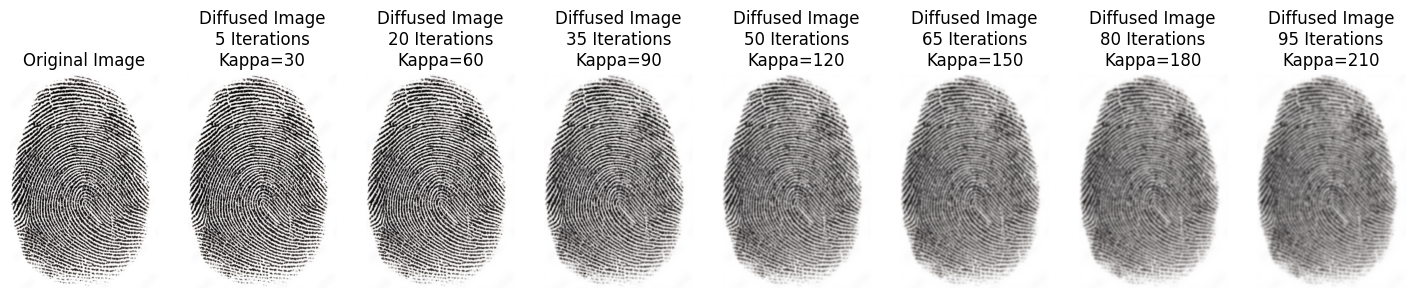

In [8]:

img = cv2.imread('./cv-assignment/assets/thumb.jpg') # Load a color image

iterations = [5, 20, 35, 50,65,80,95]  # Define the number of iterations for diffusion

kappa_values = [30, 60, 90, 120,150,180,210]  # Define the kappa values for diffusion

plot_images(img, iterations, kappa_values)  # Plot the images

End

---